## Advanced Lane Finding

### Udacity SDCND - Project 4 

In this project, my goal is to write a software pipeline to identify the lane boundaries in a video from a front-facing camera on a car.

In [12]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
from collections import deque
%matplotlib inline

### Step 1: Restore from Distortion

The first step in the project is to remove the distortion from the images. Chessboard is a good method to calculate the camera calibration matrix and distortion coefficients. 

Step1: 1) calculate the calibration matrix and distortion coefficients

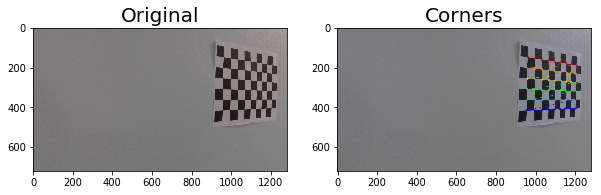

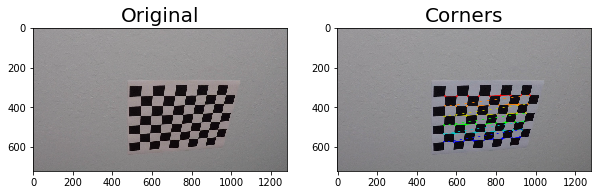

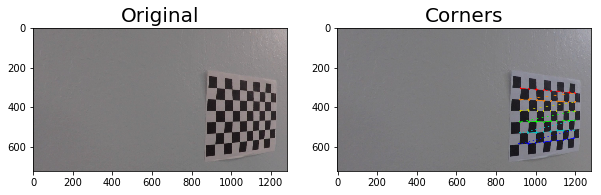

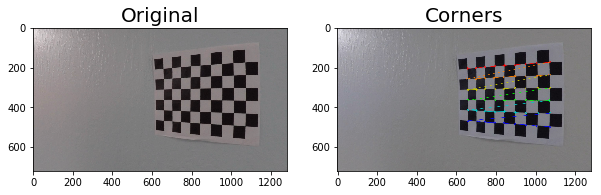

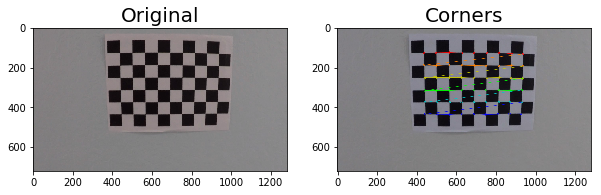

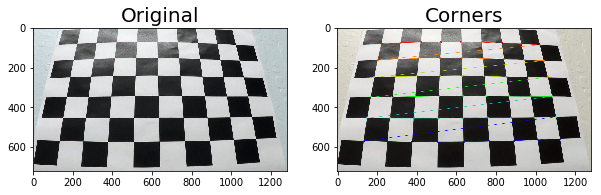

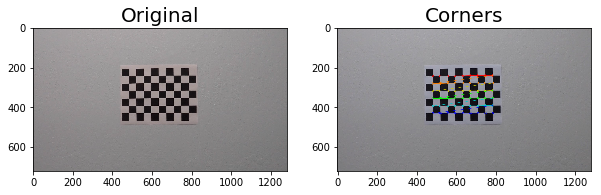

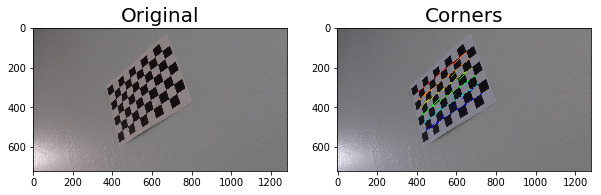

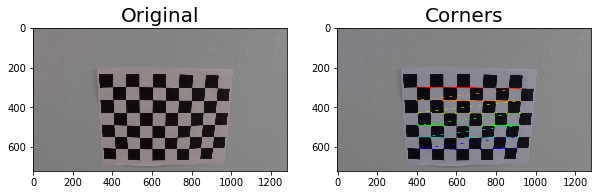

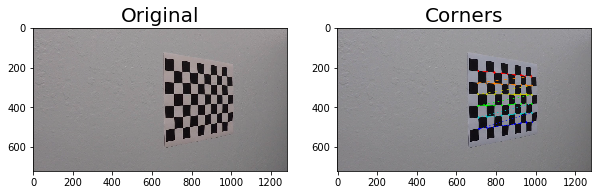

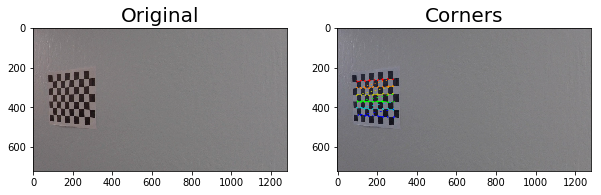

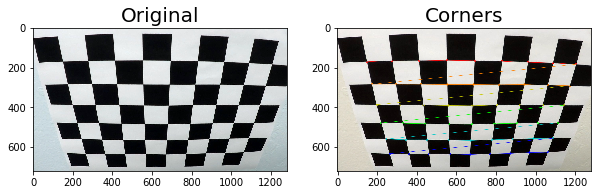

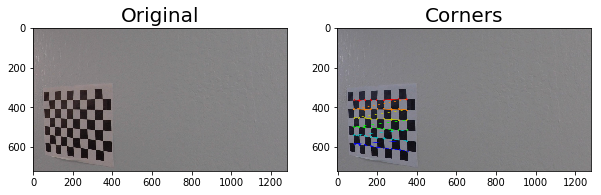

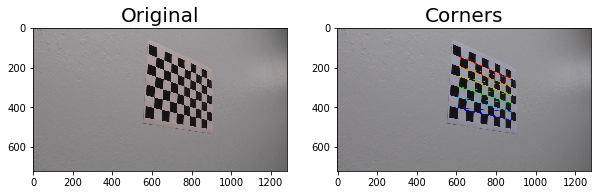

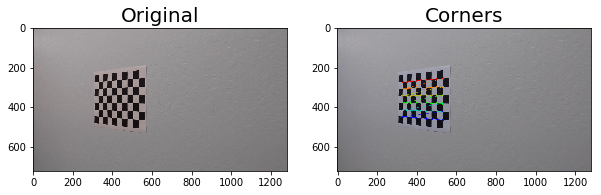

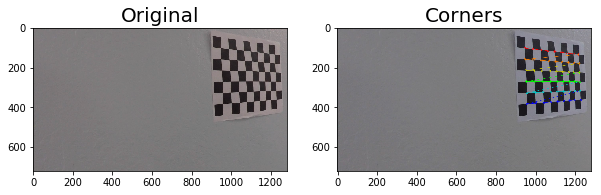

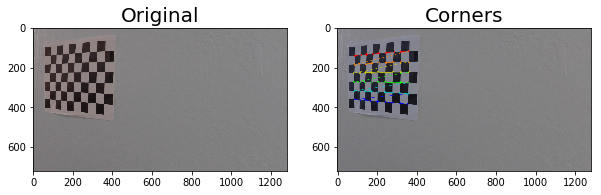

In [4]:
chessX = 6
chessY = 9

objp = np.zeros((chessX*chessY,3), np.float32)
objp[:,:2] = np.mgrid[0:chessY, 0:chessX].T.reshape(-1,2)


# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (chessY,chessX), None)
    
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (chessY,chessX), corners, ret)
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
        ax1.imshow(cv2.cvtColor(mpimg.imread(fname), cv2.COLOR_BGR2RGB))
        ax1.set_title('Original', fontsize=20)
        ax2.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax2.set_title('Corners', fontsize=20)


Step1: 2) Remove the distortion from image, and examples. 

In [14]:
def undistortion_coeff(objpoints,imgpoints,imgSize):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imgSize, None, None)
    return mtx, dist

def undistortion(image,mtx, dist):
    undist = cv2.undistort(image, mtx, dist, None, mtx)
    return undist

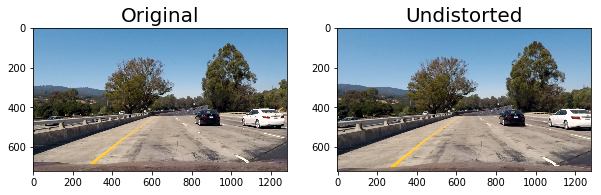

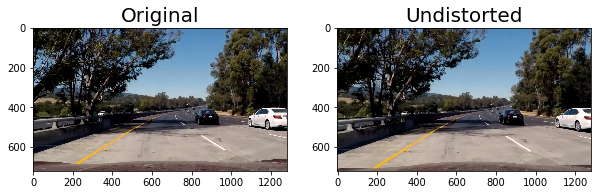

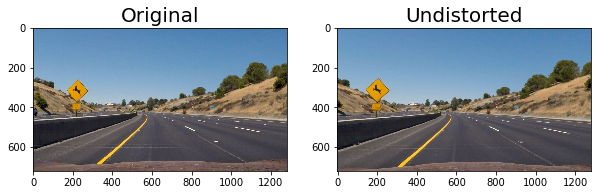

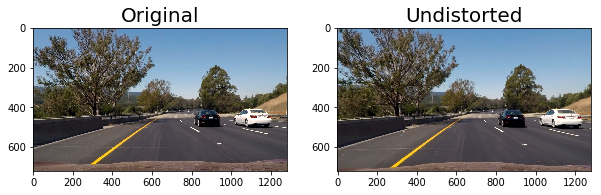

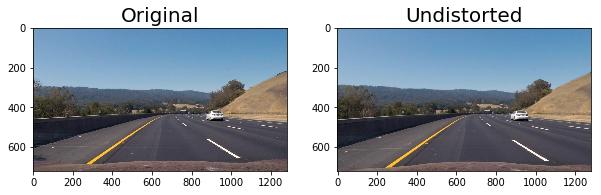

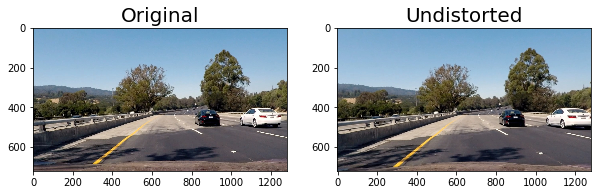

In [16]:
images = glob.glob('test_images/test*.jpg')

imgSize_img = cv2.imread(images[0])
imgSize = (imgSize_img.shape[1], imgSize_img.shape[0])
mtx, dist = undistortion_coeff(objpoints,imgpoints,imgSize)
for imageFile in images:
    image = cv2.imread(imageFile)
    undis_img = undistortion(image,mtx, dist)
    
    # Draw and display the Unstored Image
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original', fontsize=20)
    ax2.imshow(cv2.cvtColor(undis_img, cv2.COLOR_BGR2RGB))
    ax2.set_title('Undistorted', fontsize=20)


After this step, the image can transfer undistorted images. We finish the first step of this project.  

### Step2: Perspective Transform. 

This function is used for transform the image to the top viwer. 

In [35]:
def PerspectiveTrans(image): 
    undis = undistortion(image,mtx, dist)
    
    img_size = (undis.shape[1], undis.shape[0])
    
    src = np.float32([[490, 482],[810, 482],
                      [1250, 720],[40, 720]])
    dst = np.float32([[0, 0], [1280, 0], 
                     [1250, 720],[40, 720]])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(undis, M, img_size)
    return warped, M


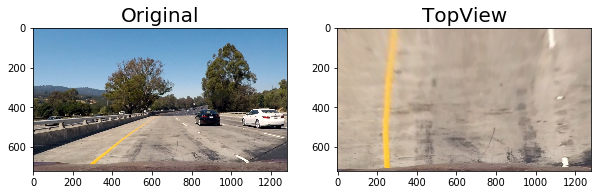

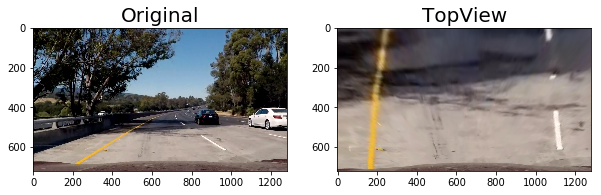

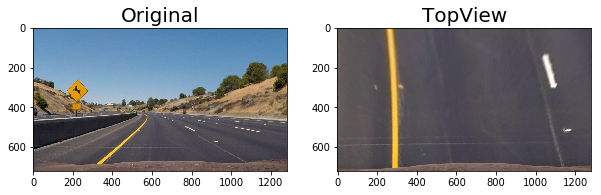

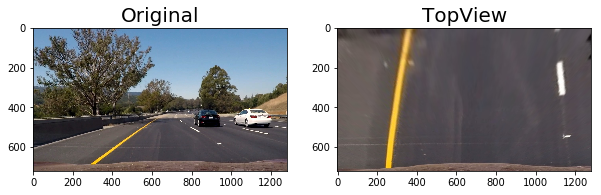

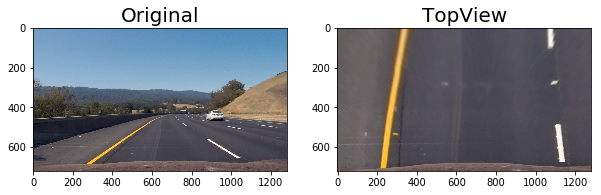

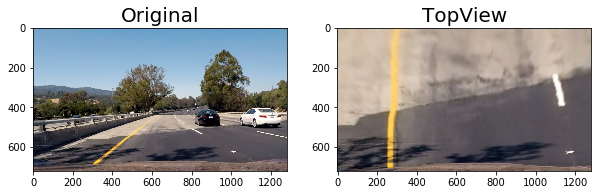

In [36]:
images = glob.glob('test_images/test*.jpg')
for imageFile in images:
    image = cv2.imread(imageFile)
    warped_img,M = PerspectiveTrans(image)
    
    # Draw and display the Unstored Image
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original', fontsize=20)
    ax2.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))
    ax2.set_title('TopView', fontsize=20)


### Step 3 gradient threshold

In [ ]:
def gradient_threshold(img):
    warped_img,M = PerspectiveTrans(image)
    hls = cv2.cvtColor(warped_img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    
    